# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])
except:
    print('Не удалось загрузить файл, проверьте путь.')

Посмотрим из чего состоит датасет:

In [3]:
df.iloc[:3, :12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False


In [4]:
df.iloc[:3, 12:]

,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<AxesSubplot:>

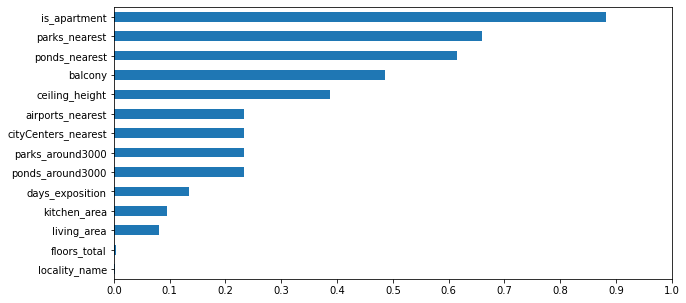

In [6]:
# Определим процентное содержимое пропусков в признаках
df.isna().mean().sort_values() \
    .where(lambda x: x > 0) \
    .dropna() \
    .plot(kind='barh', figsize=(10,5), xlim=(0,1), xticks=np.linspace(0,1,11))

In [7]:
df.describe(include='number')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
df.describe(include=['object','bool'])

,is_apartment,studio,open_plan,locality_name
count,2775,23699,23699,23650
unique,2,2,2,364
top,False,False,False,Санкт-Петербург
freq,2725,23550,23632,15721


### Вывод

**По типам**
* is_apartment должен быть булев типа. Тип float, потому что есть NaN.
* floors_total, balcony, parks_around3000 и ponds_around3000 - int.

**По пропускам**
* Пропуски в is_apartment вероятно означают что объект не является апартаментами, поэтому заполним 0 (False).
* NaN в парках, прудах говорит об их отсутствии или что их не указали.
* Пропуски в количестве балконов - отсутствие балконов.
* Высоту потолков можно заполнить медианой.
* Пропуски в площади кухни и жилой площади могут быть связаны с квартирами со свободной планировкой (жилье в бетоне).
* Число этажей и имя локации - нужно смотреть.
* Остальные NaN вероятно просто не заполнены.

**По значения признаков (что вызывает вопросы)**
* 0 комнат.
* Высота потолка 1м и 100м.
* days_exposition 1580 дней.

## Предобработка данных

Переведем названия локаций к нижниму регистру. Just in case make everything lowercase.

In [9]:
df.locality_name = df.locality_name.str.lower()

Заполним пропуски is_apartment и поменяем тип на bool.

In [10]:
df.is_apartment = df.is_apartment.fillna(0).astype(bool)

Пропуск в числе балконов определим как их отсутствие. После чего заменим тип на int.

In [11]:
df.balcony = df.balcony.fillna(0).astype(int)

> Расстояние до центра, аэропорта, ближайшего парка и водоёма получены системой.

Сначала проверим есть ли парки или водоемы, для которых имеются противоречивые данные. Например, парк в пределах 3км есть, а расстояние числится 0.

Видно, что противоречий нет и пропуски в parks_nearest и ponds_nearest вызваны отсутствием парков и водоемов соответственно.

In [12]:
len(df.query('parks_nearest.isna() and parks_around3000>0')) + \
len(df.query('ponds_nearest.isna() and ponds_around3000>0')) + \
len(df.query('parks_nearest>0 and parks_around3000.isna()')) + \
len(df.query('ponds_nearest>0 and ponds_around3000.isna()'))

0

Заполняем parks_around3000 и ponds_around3000 нулями и меняем тип на int.

In [13]:
df.parks_around3000 = df.parks_around3000.fillna(0).astype(int)
df.ponds_around3000 = df.ponds_around3000.fillna(0).astype(int)

Все _nearest NaN заменяем максимумами *1.05. Это нужно так как для ML пропуски плохи, а эти признаки в дальнейшем все равно нужно переводить в категории удаленности. Данные значения попадут в крайнюю группу 'Очень далеко'. Тип - int.

In [14]:
# Дополнительно введем новый признак чтобы понимать, где данные отсутствовали.
df['city_c_na'] = df.cityCenters_nearest.isna()

df.cityCenters_nearest = df.cityCenters_nearest.fillna(df.cityCenters_nearest.max()*1.05).astype(int)
df.parks_nearest = df.parks_nearest.fillna(df.parks_nearest.max()*1.05).astype(int)
df.ponds_nearest = df.ponds_nearest.fillna(df.ponds_nearest.max()*1.05).astype(int)
df.airports_nearest = df.airports_nearest.fillna(df.airports_nearest.max()*1.05).astype(int)

Высота потолка слабо коррелирует с целевым показателем - стоимостью, поэтому можно грубо заполнить пропуски медианными значениями.

In [15]:
# Корреляция между высотой и ценой
df['last_price'].corr(df['ceiling_height'])

0.08543030982842602

Text(0, 0.5, 'Частота')

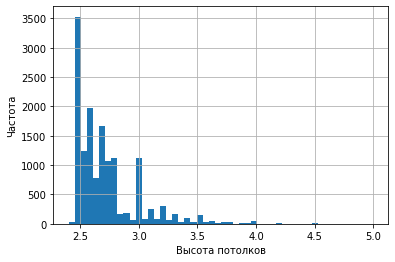

In [16]:
# Гистограмма по высоте
ax = df.ceiling_height.hist(bins=50, range=(2.4,5))
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Частота')

В Потолках выше 10 метров возможно есть ошибка в порядке числа (не 25, а 2.5). Поделим их на 10.

In [17]:
df.loc[df['ceiling_height']>12,'ceiling_height']

355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
15061     14.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

In [18]:
df.loc[df['ceiling_height']>50,'ceiling_height']  = df.ceiling_height.median()
df.loc[df['ceiling_height']>12,'ceiling_height'] = df.loc[df['ceiling_height']>12,'ceiling_height']/10

Минимальной нормой в России считается высота потолка 2.4 метра. Поэтому потолки ниже приравняем медиане.

In [19]:
df.loc[df.ceiling_height<2.4,'ceiling_height'] = df.ceiling_height.median()
# NaN так же приравняем медиане и добавим признак.
df['ceiling_h_na'] = df.ceiling_height.isna()
df.ceiling_height = df.ceiling_height.fillna(df.ceiling_height.median())

Число дней до снятия объявления с пропусками зависит от года. Можно допустить, что квартиры с NaN на момент выгрузки не проданы. В 2019 более 60% NaN, а в 2016 меньше 3%.

In [20]:
# Делим сгруппированные по годам суммы NaN значения на сгруппированные по годам суммы всех значений столбца first_day_exposition.
(
    df[df.days_exposition.isna()].groupby(df.first_day_exposition.dt.year).count()['first_day_exposition'] /
    df.groupby(df.first_day_exposition.dt.year).count()['first_day_exposition']
)

first_day_exposition
2014    0.131387
2015    0.058774
2016    0.024075
2017    0.033089
2018    0.112572
2019    0.623828
Name: first_day_exposition, dtype: float64

Связи между пропусками в living_area, kitchen_area и типом квартиры (студия или свободная планировка) не обнаружено. Пропусков значительно больше.

In [21]:
len(df.query('living_area.isna() and (studio or open_plan)')) + \
len(df.query('kitchen_area.isna() and (studio or open_plan)'))

231

In [22]:
len(df.query('kitchen_area.isna() and living_area.isna()'))

1464

In [23]:
len(df.query('kitchen_area.isna() or living_area.isna()'))

2717

У living_area очень высокая корреляция с total_area. А у kitchen_area умеренная.

In [24]:
df['total_area'].corr(df['living_area'])

0.9395373338721494

In [25]:
df['total_area'].corr(df['kitchen_area'])

0.6091211711198316

In [26]:
(df['total_area']-df['living_area']).corr(df['kitchen_area'])

0.7350690887752209

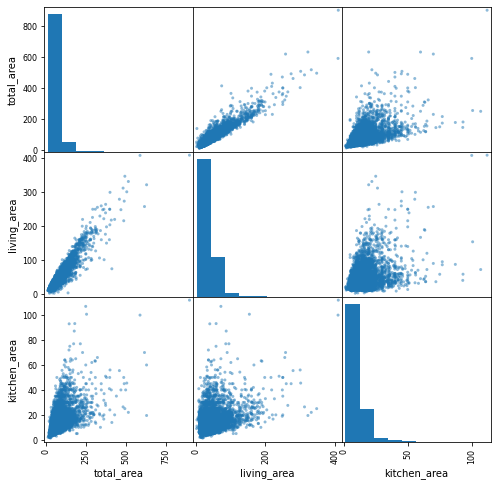

In [27]:
# Построим матрицу рассеяния.
pd.plotting.scatter_matrix(df[['total_area','living_area','kitchen_area']],
                           figsize=(8,8)
);

Можно воспользоваться линейной регрессией и найти kitchen_area и living_area, но пока сохраним пропуски.

Строк с пропущенными значеними во floors_total и locality_name очень мало. Их проще отбросить.

In [28]:
df = df.dropna(subset=['floors_total','locality_name']).reset_index(drop=True)

In [29]:
# Дробных этажей не бывает
df.floors_total = df.floors_total.astype(int)

In [30]:
df.shape

(23565, 24)

Проверим наличие явных дубликатов.

In [31]:
df.duplicated().sum()

0

Посчитаем число уникальных населенных пунктов.

In [32]:
len(df.locality_name.unique())

364

Удалим часть неявных дубликатов заменив ё на е.

In [33]:
df.locality_name = df.locality_name.replace('ё','е', regex=True)
len(df.locality_name.unique())

330

## Расчёты и добавление результатов в таблицу

Определим цену квадратного метра:

In [34]:
df['price_sq'] = np.ceil(df.last_price / df.total_area)

Создадим новые признаки: день недели, месяц и год первого дня экспликации.

In [35]:
df['expo_weekday'] = df.first_day_exposition.dt.weekday.astype(int)
df['expo_month'] = df.first_day_exposition.dt.month.astype(int)
df['expo_year'] = df.first_day_exposition.dt.year.astype(int)

# Альтернатива
# df.first_day_exposition.astype('datetime64[M]')

Добавим соотношения жилой и общей площади, площади кухни к общей.

In [36]:
df['liv_to_total_area'] = df.living_area / df.total_area
df['kit_to_total_area'] = df.kitchen_area / df.total_area

Сначала создадим признак со значениями 'другой', потом доопределим в зависимости от выполнения условий.

In [37]:
df['floor_type'] = 'другой'
df['floor_type'] = df.floor_type \
    .where(df.floors_total != df.floor, 'последний') \
    .where(df.floor != 1, 'первый')
df['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

## Исследовательский анализ данных

### Построим гистограммы для параметров: площадь, цена, число комнат, высота потолков

Графики имеют вид распределения Пуассона.

<AxesSubplot:ylabel='Frequency'>

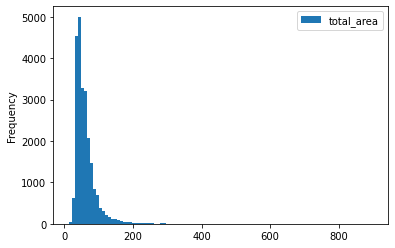

In [38]:
df.plot(y='total_area', kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

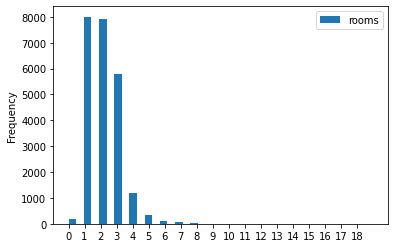

In [39]:
df.plot(y='rooms', kind='hist', bins=40, xticks=range(df.rooms.max()))

<AxesSubplot:ylabel='Frequency'>

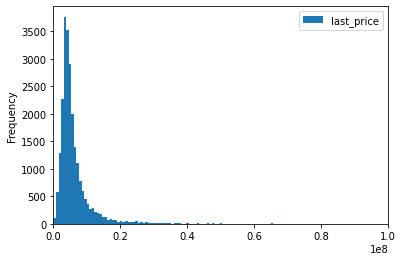

In [40]:
df.plot(y='last_price', kind='hist', bins=1000, xlim=(0,10**8))

Так как в столбце высота потолков было много NaN, построим сравнительную гистограмму. Ожидаемо получился пик.

(2.0, 6.0)

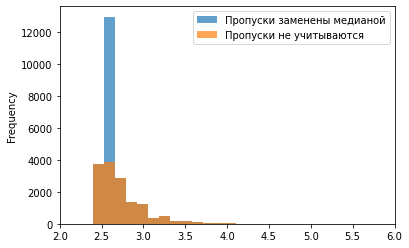

In [41]:
ax = df.plot(y='ceiling_height', kind='hist', bins=60, alpha=0.7)
df[df.ceiling_h_na==False].plot(y='ceiling_height', kind='hist', bins=60, ax=ax, alpha=0.7)
ax.legend(['Пропуски заменены медианой','Пропуски не учитываются'])
ax.set_xlim(2,6)

In [42]:
# Объекты с площадью выше 500 кв.м.
df[df.total_area>500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,city_c_na,ceiling_h_na,price_sq,expo_weekday,expo_month,expo_year,liv_to_total_area,kit_to_total_area,floor_type
3103,19,140000000.0,631.0,2019-03-30,7,2.65,5,NaN,5,False,...,NaN,False,True,221871.0,5,3,2019,NaN,0.095087,последний
4216,1,50000000.0,517.0,2017-10-14,7,2.65,4,332.0,3,False,...,NaN,False,True,96712.0,5,10,2017,0.642166,0.042553,другой
5330,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,14.0,False,False,110170.0,3,2,2019,0.693220,0.169492,другой
7977,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.5,7,True,...,1078.0,False,False,165681.0,3,12,2015,0.594675,0.089744,последний
12787,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,NaN,False,False,221800.0,1,4,2019,0.510615,0.030894,последний
15565,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,111.0,False,False,485437.0,0,12,2017,0.417476,0.113269,другой
19431,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,106.0,False,False,466667.0,2,12,2017,0.455222,0.124444,последний


* Общая площадь сконцентрирована в районе 60 кв.м. Проблем нет. Объекты с огромной площадь малочисленны и стоят дорого.

In [43]:
df[df.rooms == 0].sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,city_c_na,ceiling_h_na,price_sq,expo_weekday,expo_month,expo_year,liv_to_total_area,kit_to_total_area,floor_type
10547,14,2950000.0,25.27,2017-11-17,0,2.65,25,25.0,11,False,...,51.0,False,True,116740.0,4,11,2017,0.989315,NaN,другой
12666,10,2300000.0,20.50,2018-07-01,0,2.65,25,15.5,13,False,...,30.0,True,True,112196.0,6,7,2018,0.756098,NaN,другой
19588,17,4200000.0,24.60,2018-03-15,0,2.75,16,18.9,9,False,...,75.0,False,False,170732.0,3,3,2018,0.768293,NaN,другой
12918,5,2500000.0,29.00,2019-04-17,0,2.65,9,20.0,3,False,...,5.0,False,True,86207.0,2,4,2019,0.689655,NaN,другой
23310,0,2500000.0,27.70,2017-09-28,0,2.65,24,18.0,4,False,...,4.0,True,True,90253.0,3,9,2017,0.649819,NaN,другой


In [44]:
# Медианная общая площадь для всей выборки.
df.total_area.median()

52.0

In [45]:
# Медианная общая площадь для объектов с 0 комнат.
df[df.rooms == 0].total_area.median()

26.075000000000003

In [46]:
# Максимальная общая площадь объекта с 0 комнат.
df[df.rooms == 0].total_area.max()

371.0

In [47]:
# Узнаем сколько объектов имею 0 комнат за вычетом studio или open_plan.
len(df.query('rooms == 0')) - len(df.query('rooms == 0 and (studio or open_plan)'))

0

* Все объекты с числом комнат равным 0 относятся к студиям или имеют свободную планировку. Медианная площадь 26 так же подтверждает эту гипотезу.

In [48]:
# Посмотрим самые дорогие предложения.
df.sort_values('last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,city_c_na,ceiling_h_na,price_sq,expo_weekday,expo_month,expo_year,liv_to_total_area,kit_to_total_area,floor_type
12897,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,33.0,False,True,1907500.0,5,9,2017,0.625000,NaN,последний
19431,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,106.0,False,False,466667.0,2,12,2017,0.455222,0.124444,последний
14621,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,393.0,False,True,1000749.0,5,2,2016,0.508728,0.059850,последний
1431,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,233.0,False,False,1736843.0,2,4,2018,0.500000,0.210526,другой
15565,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,111.0,False,False,485437.0,0,12,2017,0.417476,0.113269,другой
22701,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,NaN,False,False,1542605.0,1,3,2019,0.339733,0.161067,последний
16372,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,249.0,False,False,857543.0,0,4,2017,0.639832,0.104305,другой
13671,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,199.0,False,False,585366.0,5,4,2017,0.531707,0.097561,последний
5863,3,230000000.0,500.0,2017-05-31,6,2.65,7,NaN,7,False,...,50.0,False,True,460000.0,2,5,2017,NaN,0.080000,последний
8857,13,190870000.0,268.0,2016-03-25,3,2.65,8,132.0,7,False,...,901.0,False,True,712202.0,4,3,2016,0.492537,0.149254,другой


In [49]:
# Посмотрим самые дешевые предложения.
df.sort_values('last_price').head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,city_c_na,ceiling_h_na,price_sq,expo_weekday,expo_month,expo_year,liv_to_total_area,kit_to_total_area,floor_type
8750,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,8.0,False,False,112.0,2,3,2019,0.293578,0.371560,последний
17359,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,False,...,NaN,True,True,14145.0,0,4,2019,0.526316,0.197368,первый
14825,5,430000.0,54.0,2018-06-26,2,2.65,3,NaN,3,False,...,44.0,True,True,7963.0,1,6,2018,NaN,NaN,последний


* С ценой видимых проблем не обнаружено. Только у одного объекта заниженная цена и крайне низкая стоимость кв. метра.

* Неточности в данных по потолкам устранены в предыдущем этапе. Был исправлен порядок для потолков выше 10м, слишком низкие потолки приравнены к медианным значением.

### Изучим время продажи квартиры

<AxesSubplot:ylabel='Frequency'>

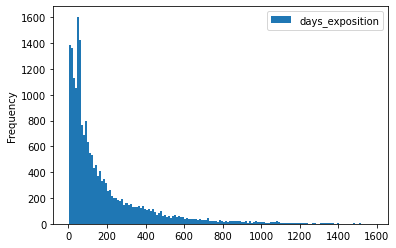

In [50]:
df.plot(y='days_exposition', kind='hist', bins=150)

<AxesSubplot:ylabel='Frequency'>

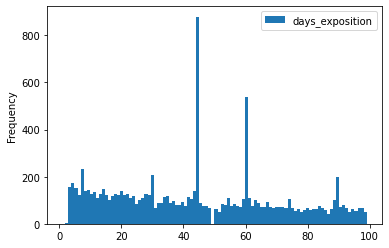

In [51]:
# Отбросим продажи в дни 44 и 60, так как вероятно это снятия объявлений без реальной продажи, цены не релевантные.
df[df.days_exposition < 100].plot(y='days_exposition', kind='hist', bins=100)

* Среднее значение смещено правее от медианы и почти в 2 раза превышает его.
* Пики на 40 и 60 днях возможно обусловленным не продажей а снятием объявления по другим причинам. Поэтому стоит их исключить.

In [52]:
df = df.query('days_exposition !=44 and days_exposition != 60')

In [53]:
df.days_exposition.agg(['mean','median'])

mean      184.012893
median    100.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

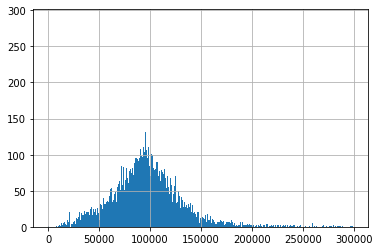

In [54]:
# Распределение стоимости квадратных метров
df[df.price_sq<300000].price_sq.hist(bins=1000)

In [55]:
# Добавим новый признак в котором выделим следующие группы по стоимости квадратного метра.
bins = [0, 50000, 75000, 125000, 150000, 200000, np.infty]
df['pr_sq_bins'] = pd.cut(df.price_sq, bins=bins)

Найдем среднее и медиану времени экспликации для различных стоимостных групп.

In [56]:
for name, group_data in df.groupby('pr_sq_bins'):
    print(name, ':\t',
          np.floor(group_data.days_exposition.mean()),'\t',
          np.floor(group_data.days_exposition.median())
    )

(0.0, 50000.0] :	 181.0 	 100.0
(50000.0, 75000.0] :	 189.0 	 105.0
(75000.0, 125000.0] :	 174.0 	 95.0
(125000.0, 150000.0] :	 202.0 	 103.0
(150000.0, 200000.0] :	 229.0 	 119.0
(200000.0, inf] :	 271.0 	 178.0


* days_exposition для недорогих и очень дорогих объектов выше. В первом случае это связано с качеством и расположением недвижимости, во втором с общей тенденций продаж на рынке элитного жилья.
* Объекты в диапазоне 75000-150000 руб. за кв.м. продаются быстрее остальных.
* Продажи обычно проходят в первые 3 месяца экспликации объекта.
* Продажи в первые месяцы можно считать быстрыми, а те, которые длились дольше 3-4 месяцев долгими (не считая премиум сегмент).

### Оценим наличие выбросов в датасете

In [57]:
df.describe(include='number')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq,expo_weekday,expo_month,expo_year,liv_to_total_area,kit_to_total_area
count,23027.000000,2.302700e+04,23027.000000,23027.000000,23027.000000,23027.000000,21350.000000,23027.000000,20984.000000,23027.00000,...,23027.000000,23027.000000,23027.000000,19856.000000,2.302700e+04,23027.000000,23027.000000,23027.000000,21350.000000,20984.000000
mean,9.895948,6.552082e+06,60.317724,2.068615,2.698782,10.620185,34.455952,5.852130,10.556391,0.59339,...,2374.856777,0.589048,1069.508316,184.012893,9.933037e+04,2.561124,6.398098,2017.366179,0.564943,0.187320
std,5.677716,1.103440e+07,35.973024,1.082692,0.238037,6.572476,22.159621,4.858743,5.928726,0.96084,...,1369.621473,0.884647,466.881841,221.777031,5.082845e+04,1.785471,3.486805,1.043532,0.105283,0.073029
min,0.000000,1.219000e+04,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.00000,...,1.000000,0.000000,13.000000,1.000000,1.120000e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.00000,...,601.000000,0.000000,640.000000,44.000000,7.621450e+04,1.000000,3.000000,2017.000000,0.495327,0.133333
50%,9.000000,4.600000e+06,51.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.00000,...,3349.000000,0.000000,1411.000000,100.000000,9.482800e+04,3.000000,6.000000,2017.000000,0.568182,0.172348
75%,14.000000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.00000,...,3349.000000,1.000000,1411.000000,238.000000,1.141515e+05,4.000000,10.000000,2018.000000,0.638007,0.232493
max,50.000000,7.630000e+08,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.00000,...,3349.000000,3.000000,1411.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


In [58]:
df.shape

(23027, 32)

* Рациональным будет решение отбросить объекты стоимость выше 100млн. руб. Кроме того их немного.

In [59]:
len(df[df.last_price > 1*10**8])

37

In [60]:
df = df[df.last_price <= 1*10**8]

In [61]:
# Сформируем количественные данные
quantitative = list(df.describe(include='number').columns)

Построим графики для всех quantitative данных чтобы оценить их влияние на цену

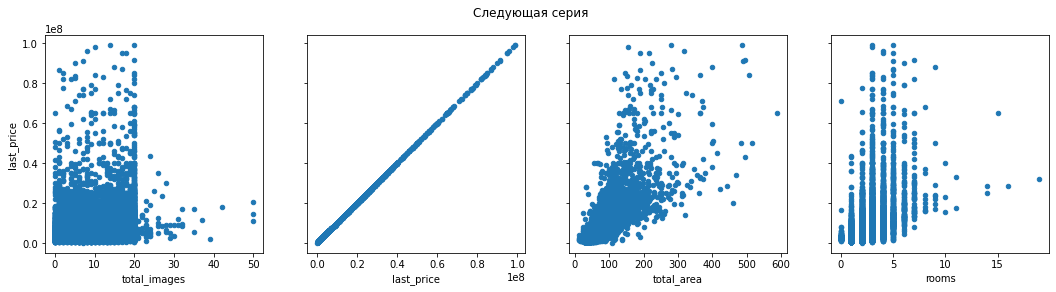

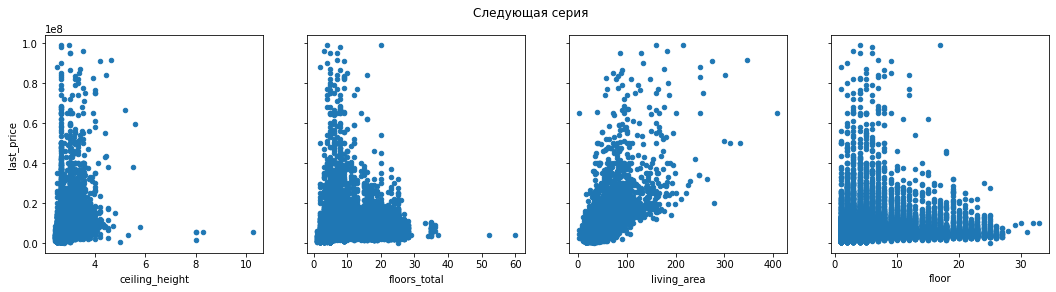

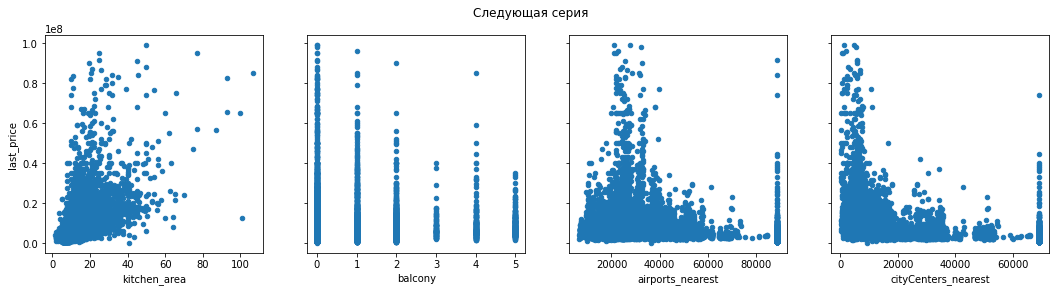

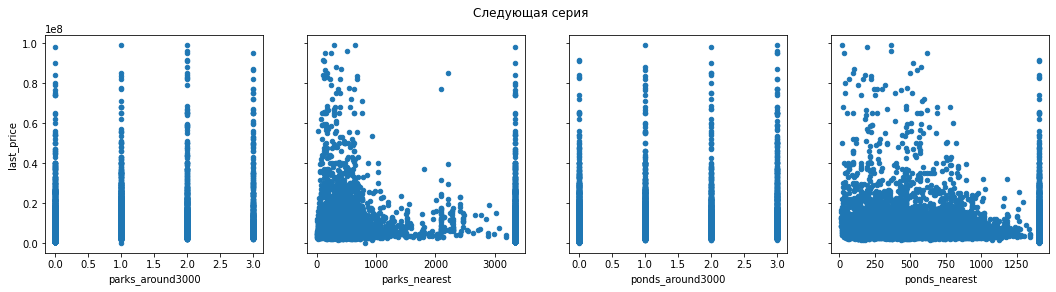

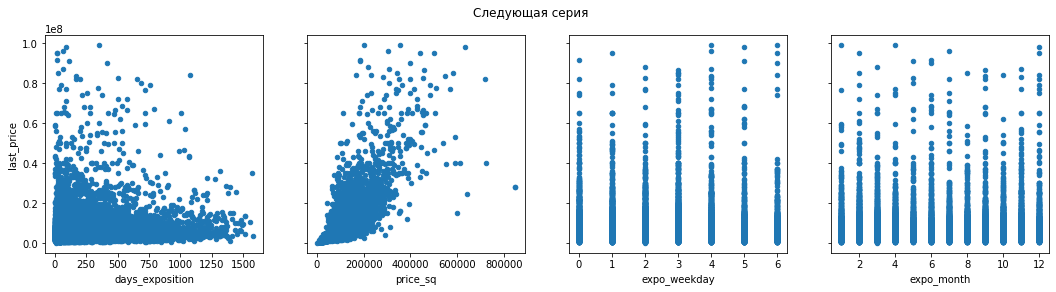

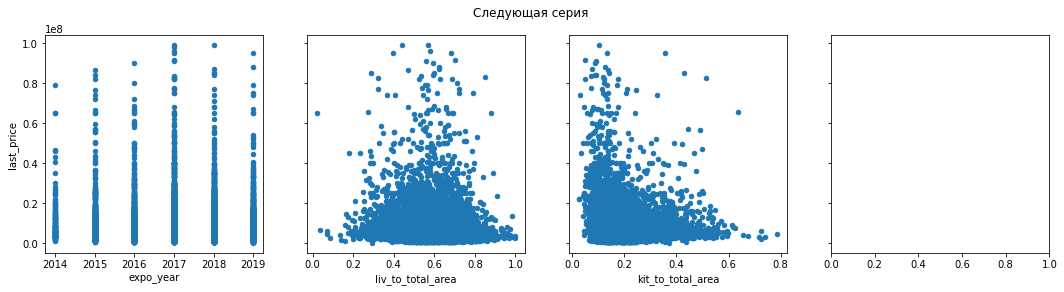

In [62]:
i=0
while i < len(quantitative):
    # У графиков общая ось и их будет выводиться по 4 штуки
    fig, axes = plt.subplots(1, 4, figsize=(18,4), sharey=True)
    fig.suptitle('Следующая серия')
    # k - номер графика от 0 до 3
    k=0
    for j in range(i,i+4):
        if j >= len(quantitative):
            # Если выводить больше нечего - выход из цикла
            break
        else:
            df.plot(kind='scatter', y='last_price', x=quantitative[j], ax=axes[k])
        k+=1
    i+=4
    plt.show()

### Факторы, влияющие на стоимость жилья

Вывод на основе предыдущих графиков:
* Разброс стоимости уменьшается при количестве фото превышающее 20. Возможно ввели ограничение на число фоток.
* С ростом общей площади растет и цена. Тоже касается и числа комнат, жилой площади и площади кухни, так как, по сути, это один тот же признак.
* Высота потолка особого влияния не оказывает. Видна созданная нами полка 2.4.
* С ростом этажности выше 10 происходит снижение стоимости.
* Слишком большая близость к аэропорту снижает стоимость. Удалённость от 20 до 40км является оптимальной. Колона справа говорит о разбросе цен NaN значений.
* Чем ближе к центру, тем дороже недвижимость. Колона справа говорит о разбросе цен NaN, загородная недвижимость может быть как премиум класса, там обычным деревенским домиком.
* Наличие парков позитивно влияет на стоимость, в то же время зависимости от водоемов по близости почти нет (она начинает появляться если их нет в пределах 1км.).
* Связь стоимости с ценой квадратного метра очевидна. Хотя есть выбросы с ценой выше 500т. за кв.м.
* Наиболее дорогое жилье имеет соотношение площадей жилой к общей около 0.6.
* Квартиры, в которых кухня занимает больший процент от всей площади стоят меньше, так как размер кухни в целом стандартный и с ростом общей площади (цены жилья) и процентное соотношение кухни будет падать.

Создадим список, включающий в себя признаки, содержащие булево и категориальные значения.

Кроме того, добавим: expo_weekday, expo_month, expo_year, floor_type

In [63]:
qualitative = list(df.describe(include=['bool']).columns)
qualitative.extend(['expo_weekday','expo_month','expo_year','floor_type'])

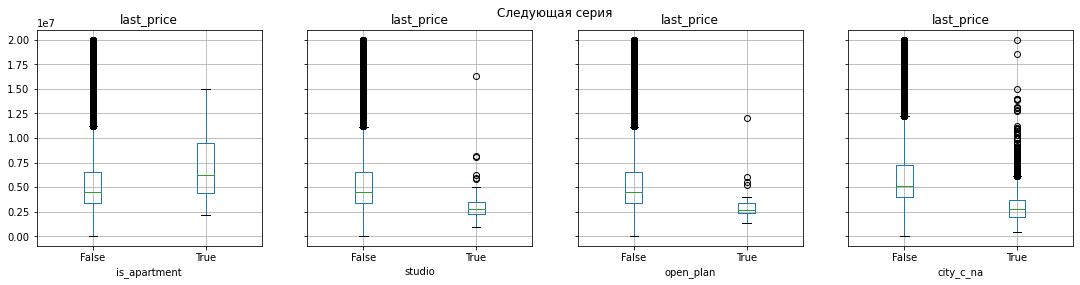

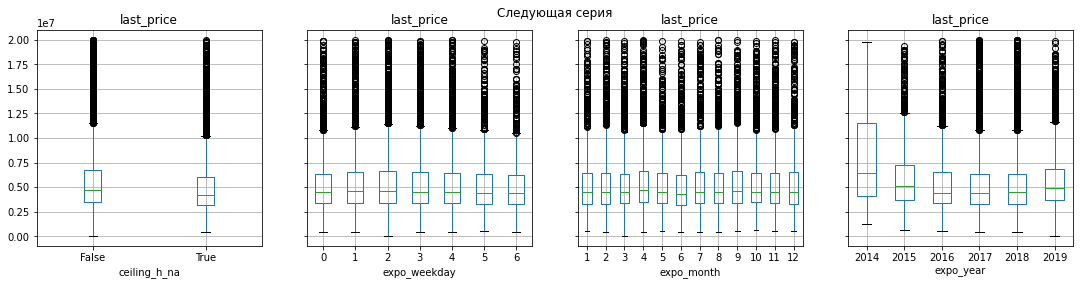

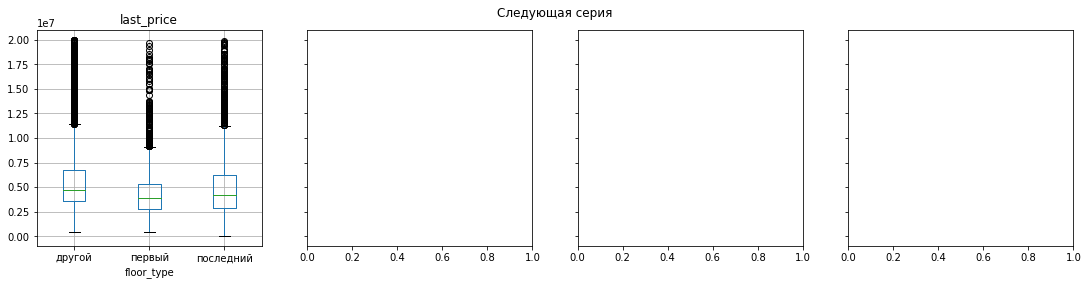

In [64]:
# Построим диаграммы размаха
i=0
while i < len(qualitative):
    fig, axes = plt.subplots(1, 4, figsize=(18,4), sharey=True)
    k=0
    for j in range(i,i+4):
        if j >= len(qualitative):
            break
        else:
        # Выше 20млн.руб. очень много выбросов, поэтому для построения графиков дополнительно фильтруем датафрейм
            df[df.last_price<2*10**7].boxplot(column='last_price',by=qualitative[j], ax=axes[k])
        k+=1
    i+=4
    fig.suptitle('Следующая серия')
    plt.show()

Выводы по диаграммам размаха:
* Апартаменты стоят чуть дороже, что не соответствует рынку на первый взгляд. Это следствие того, что в только в новых домах есть апартаменты. Локация у домов тоже зачастую лучше.
* Студии дешевле, но у них метраж меньше чем у стандартной квартиры.
* В июне и летом в целом продажи идут чуть хуже. Фактор сезонности присутствует.
* В 2014 году квартиры стояли дороже, в 2017 был минимум и дальше наметился плавный рост (что связано в том числе и с инфляцией).
* Квартиры на первых и последних этажах стоят дешевле, что соответсвует ожиданиям.
* Недвижимость, для которой не показано расстояние до цента стоит дешевле. Возможно потому что она далека от центра.

Посторим корреляцию для нужных параметров.

In [65]:
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.769828,0.474373,-0.345009
total_area,0.769828,1.000000,0.770131,-0.220192
rooms,0.474373,0.770131,1.000000,-0.161485
cityCenters_nearest,-0.345009,-0.220192,-0.161485,1.000000


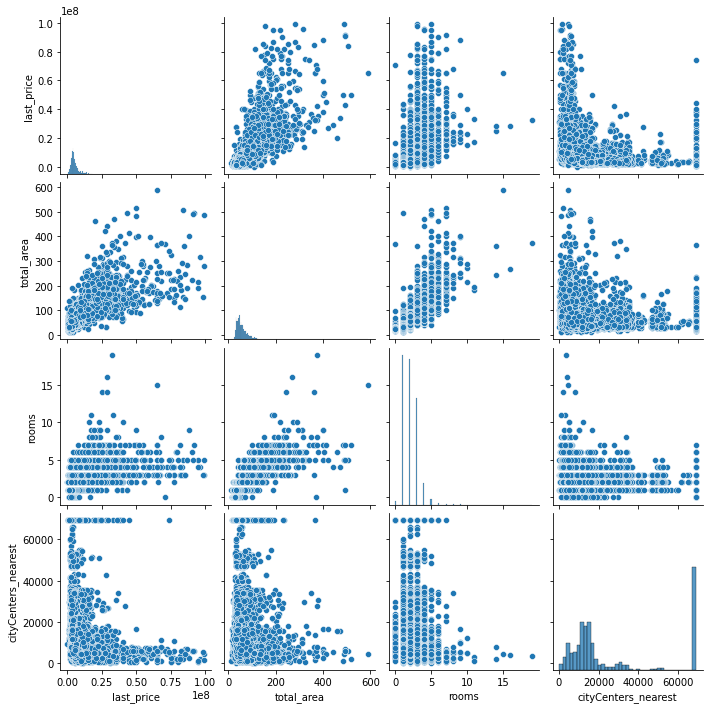

In [66]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]);

### Анализ цены квадратного метра по населенным пунктам

Создадим сводную таблицу, содержащую количество объявлений на продажу и среднюю стоимость метра жилья.

In [67]:
df_pt = df.pivot_table(index='locality_name', values='price_sq', aggfunc=['count','mean']).astype(int)
# Переименуем колонны.
df_pt.columns = ['count','avg_price']
# Отсортируем df_pt сначала по количеству объявлений, а потом в оставшихся 10 проведем сортировку по цене метра.
df_pt.sort_values('count').tail(10).sort_values('avg_price')

,count,avg_price
locality_name,,
выборг,234,57912
всеволожск,391,68450
гатчина,300,68651
колпино,331,75490
поселок шушары,428,78476
поселок мурино,542,85537
поселок парголово,315,90225
деревня кудрово,287,92423
пушкин,362,103230


Населённые пункты с самой высокой и низкой стоимостью жилья.

In [68]:
df_pt.query('avg_price == avg_price.max()')

,count,avg_price
locality_name,,
зеленогорск,24,115123


In [69]:
df_pt.query('avg_price == avg_price.min()')

,count,avg_price
locality_name,,
деревня старополье,3,11206


### Предложения квартир в СПБ в зависимости от расстояния от центра

Создадим столбец с расстоянием до центра СПБ в километрах и округлим до целых значений.

In [70]:
df['spb_centers_km'] = np.round_(
    df[df.locality_name=='санкт-петербург'].cityCenters_nearest / 1000,
    decimals=0
)

[]

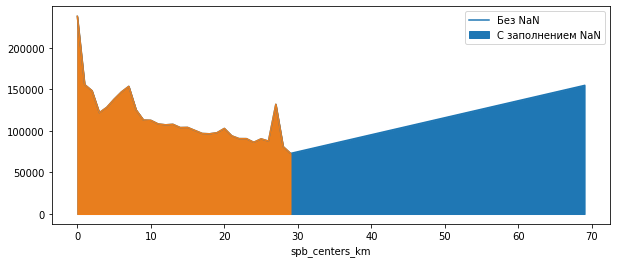

In [71]:
ax = df.groupby('spb_centers_km')['price_sq'].mean().plot.area(figsize=(10, 4))
df[df.city_c_na==False].groupby('spb_centers_km')['price_sq'].mean().plot.area(alpha=0.9, ax=ax)
ax.legend(['Без NaN','С заполнением NaN'])
ax.plot()

График позволяет не только определить центр Питера, но и сделать вывод что пропуски в СПБ были в основном у недвижимости ближе к центру или в СПБ есть элитный район, до которого система не позволяет рассчитать расстояние.

Область в радиусе 6км входит в центр СПБ.

### Сравнение стоимости квартир в центре СПБ с данными по городу в целом

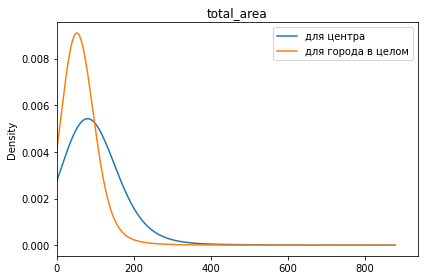

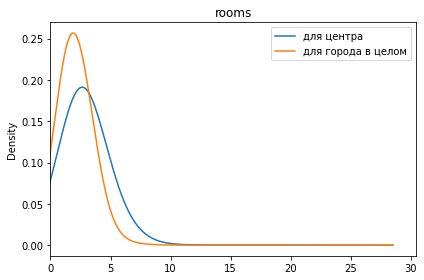

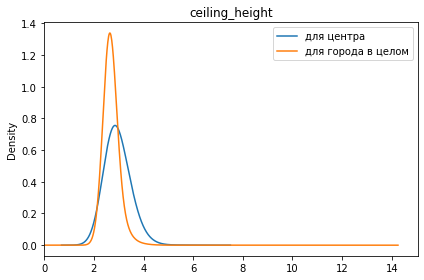

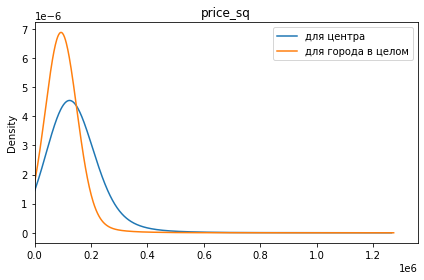

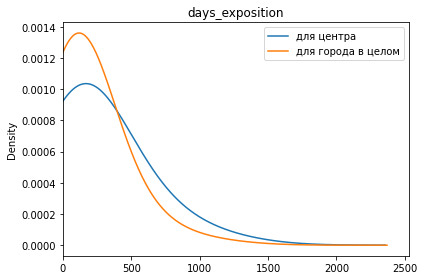

In [72]:
# Выделим интересующие нас признаки
ilist = ['total_area','rooms','ceiling_height','price_sq', 'days_exposition']
# Построим графики
for item in ilist:
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
    # bw_method больше 1 чтобы графики получились более плавными
    ax = df.query('spb_centers_km <= 6')[item].plot.density(bw_method=1.1)
    df[item].plot.density(bw_method=1.1, ax=ax)
    ax.set_title(item)
    ax.legend(['для центра','для города в целом'])
    ax.set_xlim(0,)
    ax.plot()

**Отличие выводов по центру от всего города:**
* Площадь квартир в центре выше, есть очень вместительные предложения от 200 кв.м.
* Число комнат соответственно так же больше для недвижимости в центре.
* Потолки в среднем выше в центре.
* Стоимость квадратного метра ожидаемо выше в центре.
* Время экспозиции для квартир в городе в целом меньше. Жилье в спальных районах покупается быстрее.

## Общий вывод

* Проведено исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 гг.
* Выявлены факторы, оказывающие максимальное воздействие на стоимость жилья: площадь помещения, расположение, этаж квартиры, дальность аэропорта и близость парковой зоны.
* Построена зависимость стоимости объекта по годам. Подтвержден фактор сезонности.
* Определено среднее и медианное время экспликации в зависимости от стоимости недвижимости.
* Выявлены отличия продаваемого жилья от близости к центру.